In [66]:
import requests
import pandas as pd


In [82]:
#Got Open Weather API and key to use with the URL. Download and made request
#pull out the data that will be used such as temperature in imperial. The 
#original temperature came in standard and was converted to imperial units.
temps = []

url = "http://api.openweathermap.org/data/2.5/forecast?zip=20850,us&units=imperial&appid=d7bb4169bffbbdccbe072168d0db38e7" 
page = requests.get(url)
weather_data = page.json()
a = weather_data['list']
for i in range(0, weather_data['cnt']):
    b = a[i]
    c = b['main']
    d = c['temp']

    temps.append(d)

In [83]:
#Continued getting information using the for lopps and appending information 
#on the date and time

dt_txts = []

for i in range(0, weather_data['cnt']):
    b = a[i]  
    f = b['dt_txt']
    dt_txts.append(f)


In [84]:
#For loops was used to gather the description and
#was appended to descriptions.
descriptions = []

for i in range(0, weather_data['cnt']):
    b = a[i]
    
    h = b['weather'][0]      
    description = h['description']
    descriptions.append(description)


In [85]:
#Created weather_data2 a pandas data frame containing date, temperature 
#and description.
weather_data2 = pd.DataFrame({'Date':dt_txts, "Temperature": temps, 
                              "Description": descriptions})
weather_data2

,Date,Temperature,Description
0,2020-10-05 18:00:00,64.92,clear sky
1,2020-10-05 21:00:00,64.58,clear sky
2,2020-10-06 00:00:00,57.63,clear sky
3,2020-10-06 03:00:00,55.08,clear sky
4,2020-10-06 06:00:00,52.74,clear sky
5,2020-10-06 09:00:00,51.19,clear sky
6,2020-10-06 12:00:00,52.12,clear sky
7,2020-10-06 15:00:00,62.42,clear sky
8,2020-10-06 18:00:00,69.58,clear sky
9,2020-10-06 21:00:00,70.65,clear sky


In [86]:
#Information about the weather_data2 needed to be gathered to know the data
#type. Date and Time are objects that needed to be separated
print(weather_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         40 non-null     object 
 1   Temperature  40 non-null     float64
 2   Description  40 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB
None


In [87]:
weather_data2["Date"] = pd.to_datetime(weather_data2['Date'])
weather_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         40 non-null     datetime64[ns]
 1   Temperature  40 non-null     float64       
 2   Description  40 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ KB


In [88]:
#After converting the Date and Time to data type datetime. Date and Time 
#is separated from one another.
weather_data2["Time"]=weather_data2["Date"].dt.time


In [89]:
weather_data2['Date']=weather_data2['Date'].dt.date

In [90]:
weather_data2

,Date,Temperature,Description,Time
0,2020-10-05,64.92,clear sky,18:00:00
1,2020-10-05,64.58,clear sky,21:00:00
2,2020-10-06,57.63,clear sky,00:00:00
3,2020-10-06,55.08,clear sky,03:00:00
4,2020-10-06,52.74,clear sky,06:00:00
5,2020-10-06,51.19,clear sky,09:00:00
6,2020-10-06,52.12,clear sky,12:00:00
7,2020-10-06,62.42,clear sky,15:00:00
8,2020-10-06,69.58,clear sky,18:00:00
9,2020-10-06,70.65,clear sky,21:00:00


In [91]:
#This descibes the temperature during the 5 day period whereby temperature
#was gathered every 3 hours.
weather_data2['Temperature'].describe()

count    40.000000
mean     59.684250
std       7.309277
min      47.410000
25%      54.630000
50%      58.370000
75%      64.010000
max      77.580000
Name: Temperature, dtype: float64

In [92]:
#The temperature was sorted from coldest to warmest
sorted_weather_data2 = weather_data2.sort_values(by='Temperature')
sorted_weather_data2


,Date,Temperature,Description,Time
29,2020-10-09,47.41,overcast clouds,09:00:00
30,2020-10-09,47.52,overcast clouds,12:00:00
28,2020-10-09,49.30,broken clouds,06:00:00
5,2020-10-06,51.19,clear sky,09:00:00
6,2020-10-06,52.12,clear sky,12:00:00
22,2020-10-08,52.20,clear sky,12:00:00
27,2020-10-09,52.43,few clouds,03:00:00
4,2020-10-06,52.74,clear sky,06:00:00
37,2020-10-10,54.07,overcast clouds,09:00:00
21,2020-10-08,54.21,clear sky,09:00:00


In [93]:
#This is the coldest temperature for the week
sorted_weather_data2.head()

,Date,Temperature,Description,Time
29,2020-10-09,47.41,overcast clouds,09:00:00
30,2020-10-09,47.52,overcast clouds,12:00:00
28,2020-10-09,49.30,broken clouds,06:00:00
5,2020-10-06,51.19,clear sky,09:00:00
6,2020-10-06,52.12,clear sky,12:00:00


In [94]:
#This is the warmest temperature for the week
sorted_weather_data2.tail()

,Date,Temperature,Description,Time
15,2020-10-07,69.22,clear sky,15:00:00
8,2020-10-06,69.58,clear sky,18:00:00
9,2020-10-06,70.65,clear sky,21:00:00
16,2020-10-07,77.14,clear sky,18:00:00
17,2020-10-07,77.58,clear sky,21:00:00


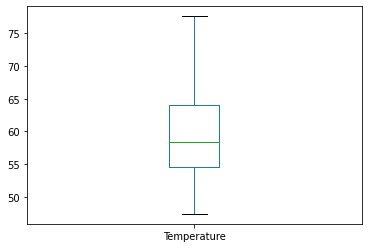

In [95]:
#Using matplotlib, a box plot was made. The temperature is stable. 
import matplotlib
weather_data2.Temperature.plot(kind = 'box')

In [96]:
#The temperature was stored in a csv filed called weather every 3 hours
weather_data2.to_csv('data.csv', encoding='utf-8', index=False)